Group 10 Assignment 6 - Data Visualization

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [13]:
df = pd.read_csv(r'C:\Users\Avery\OneDrive\Documents\GitHub\Group10_Assignment6\clean_data.csv')

df

,diagnosis,ID,imaginary_min,imaginary_avg,real_min,real_avg,gender,age,smoking,age_bin
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1.0,77,2.0,70-79
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0.0,72,2.0,70-79
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1.0,73,3.0,70-79
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1.0,76,2.0,70-79
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0.0,65,2.0,60-69
...,...,...,...,...,...,...,...,...,...,...
394,Infected,I176,-337.00,-304.000000,-626.00,-458.000000,0.0,49,2.0,40-49
395,Infected,I177,-337.00,-304.000000,-626.00,-458.000000,0.0,37,1.0,30-39
396,Infected,I178,-337.00,-304.000000,-626.00,-458.000000,0.0,29,1.0,20-29
397,Infected,I179,-337.00,-304.000000,-626.00,-458.000000,1.0,51,1.0,50-59


In this assignment we aim to ask the two follwoing questions:
1) At what age are you most likely to be dignosed with the pulmonary diseases studied?
    a) What age ranges are more common for each disease?
    b) What is the mean age for each diagnosis?

2) Can a saliva sample be sued as an indicator for common pulmonary diseases?
    a) Is it more definitive to use the minimum or average values?

In [45]:
copd = df[df['diagnosis'] == 'COPD']

hc = df[df['diagnosis'] == 'HC']

asthma = df[df['diagnosis'] == 'Asthma']

infected = df[df['diagnosis'] == 'Infected']



,diagnosis,ID,imaginary_min,imaginary_avg,real_min,real_avg,gender,age,smoking,age_bin
319,Infected,I101,-337.0,-304.0,-626.0,-458.0,0.0,38,2.0,30-39
320,Infected,I102,-337.0,-304.0,-626.0,-458.0,0.0,30,1.0,20-29
321,Infected,I103,-337.0,-304.0,-626.0,-458.0,0.0,22,3.0,20-29


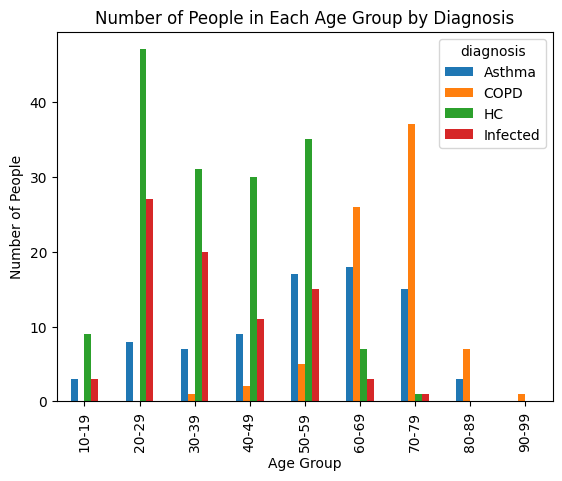

In [50]:
#Now we can see the number of people in each age group by diagnosis

age_diagnosis_number = df.groupby(['age_bin', 'diagnosis'])['diagnosis'].count()

# plot a histogram of the number of people in each age group by diagnosis
age_diagnosis_number.unstack().plot(kind='bar')

# set the plot title and axis labels
plt.title('Number of People in Each Age Group by Diagnosis')
plt.xlabel('Age Group')
plt.ylabel('Number of People')

# show the plot
plt.show()


age_stats = df.groupby('diagnosis')['age'].agg(['mean', 'var', 'count'])

hc_stats = df[df['diagnosis'] == 'HC'].agg(['mean', 'var'])
hc_stats 

<Axes: xlabel='diagnosis'>

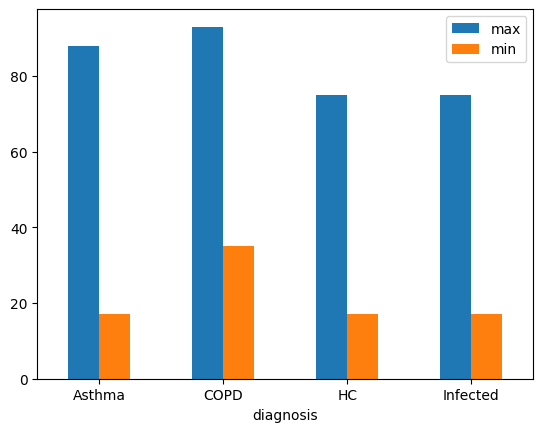

In [85]:
# Another way to see this

age_stats = df.groupby('diagnosis')['age'].agg(['max', 'min'])
age_stats = age_stats.reset_index()

age_stats.plot.bar(x='diagnosis', rot=0)



By looking at the age, there is no definitive age range for any diseases that would give a difinitive diagnosis based solely upon age.

Now we must look at the saliva content to see if we can get a definitive answer.

In [97]:
# Identify outliers in each group using linear regression
threshold = 3
outliers = []
for name, group in groups2:
    # Create linear regression model
    X = group[['real_avg']]
    y = group['imaginary_avg']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Predict values and calculate residuals
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Identify outliers based on threshold
    group_outliers = group[np.abs(residuals) > threshold * residuals.std()]
    outliers.append(group_outliers)

# Remove outliers from each group
df_clean_final = df_clean.copy()
for group_outliers in outliers:
    df_clean_final = df_clean_final.drop(group_outliers.index)


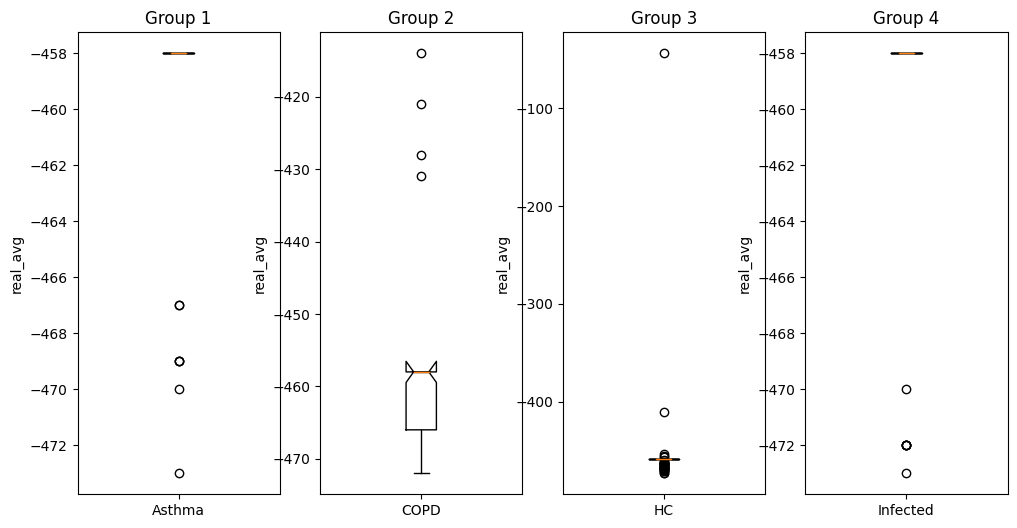

In [98]:
# Create box plots for each group
fig, axs = plt.subplots(nrows=1, ncols=len(groups2), figsize=(12,6))
for i, (name, group) in enumerate(groups2):
    axs[i].boxplot(group['real_avg'], notch=True)
    axs[i].set_xticklabels([name])
    axs[i].set_title('Group {}'.format(i+1))
    axs[i].set_ylabel('real_avg')

Using the visualization above, we can now definitively rule out Healthy Control patients as their average saliva content is much lower than those that are infected. However, the other diseases all have roughly the same content and we cannot make a definitive answer. It is imperative to look in the minimum data to see if an aswer can be seen.

In [100]:
# Identify outliers in each group using linear regression
threshold = 3
outliers = []
for name, group in groups:
    # Create linear regression model
    X = group[['real_min']]
    y = group['imaginary_min']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Predict values and calculate residuals
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Identify outliers based on threshold
    group_outliers = group[np.abs(residuals) > threshold * residuals.std()]
    outliers.append(group_outliers)

# Remove outliers from each group
df_clean = df.copy()
for group_outliers in outliers:
    df_clean = df_clean.drop(group_outliers.index)

groups2 = df_clean.groupby('diagnosis')

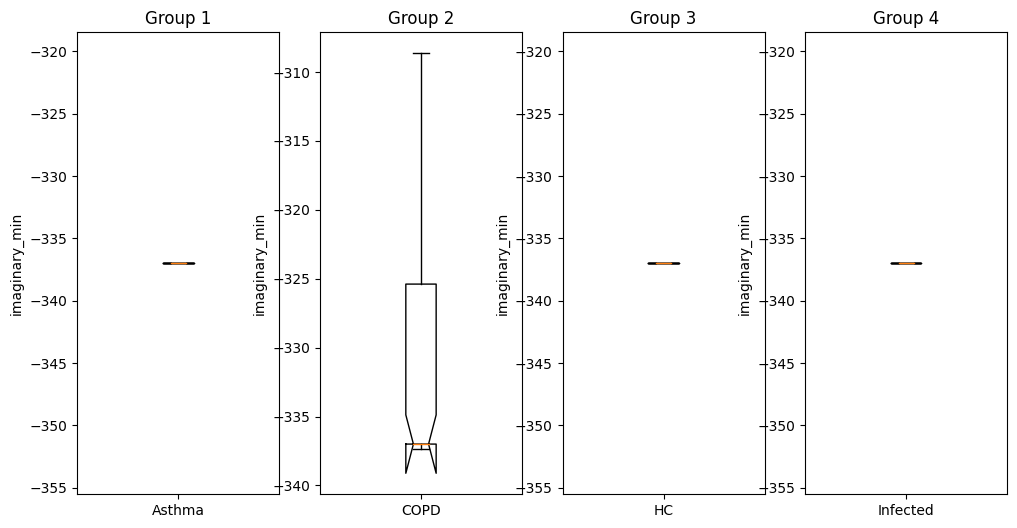

In [102]:
# Create box plots for each group
fig, axs = plt.subplots(nrows=1, ncols=len(groups2), figsize=(12,6))
for i, (name, group) in enumerate(groups2):
    axs[i].boxplot(group['imaginary_min'], notch=True, showfliers=False)
    axs[i].set_xticklabels([name])
    axs[i].set_title('Group {}'.format(i+1))
    axs[i].set_ylabel('imaginary_min')

Using solely the minimum saliva content, we are nto able to definitevely differentiate between the different pulmonary diseases. However, when combined with the average saliva contents, we are able to diagnose for the healthy control and COPD. We can diagnose healthy control solely by using the average saliva content. When combined, we are able to see that COPD has a higher average saliva content and a somewhat lower minimum saliva content. It still remains that Asthma an dthose infected cannot be differentiated as they tend to have the same results. 

As a final touch, we can look into the smoking history to see a definitive answer between asthma and infected diagnosis can be acheived.

In [119]:
df['smoking_bins'] = pd.cut(df['smoking'], bins = 3, labels = ('non-smoker', 'ex-smoker', 'active smoker'))

df

,diagnosis,ID,imaginary_min,imaginary_avg,real_min,real_avg,gender,age,smoking,age_bin,smoking_bins
0,COPD,301-4,-320.61,-300.563531,-495.26,-464,1.0,77,2,70-79,ex-smoker
1,COPD,302-3,-325.39,-314.750360,-473.73,-469,0.0,72,2,70-79,ex-smoker
2,COPD,303-3,-323.00,-317.436056,-476.12,-471,1.0,73,3,70-79,active smoker
3,COPD,304-4,-327.78,-317.399670,-473.73,-468,1.0,76,2,70-79,ex-smoker
4,COPD,305-4,-325.39,-316.155785,-478.52,-472,0.0,65,2,60-69,ex-smoker
...,...,...,...,...,...,...,...,...,...,...,...
394,Infected,I176,-337.00,-304.000000,-626.00,-458,0.0,49,2,40-49,ex-smoker
395,Infected,I177,-337.00,-304.000000,-626.00,-458,0.0,37,1,30-39,non-smoker
396,Infected,I178,-337.00,-304.000000,-626.00,-458,0.0,29,1,20-29,non-smoker
397,Infected,I179,-337.00,-304.000000,-626.00,-458,1.0,51,1,50-59,non-smoker


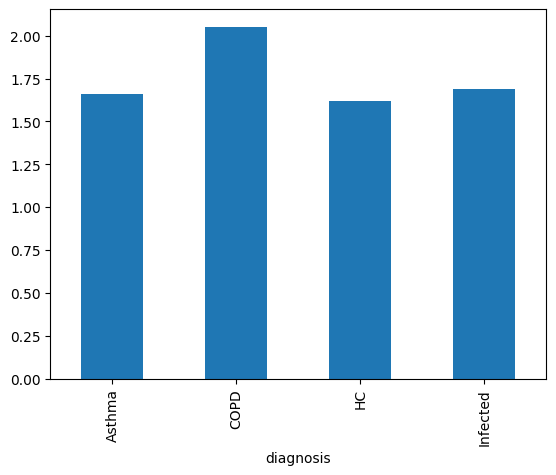

In [130]:
#Now we can convert the smoking history into bins

# convert 'smoking' column from float to integer
df['smoking'] = df['smoking'].astype(int)

smoking_number = df.groupby(['diagnosis'])['smoking'].mean()

smoking_number.plot(kind='bar')

plt.show()

Using the smoking data, it is again inconclusive to distinguish between being diagnosed with asthma and infected. Given that the study looks for a definitive test for COPD compared to other similar illnesses, like Asthma and infections, the aim of the research has been met.